In [38]:
import pandas as pd 
# import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder

# from sklearn.preprocessing import 

## DATA PREPARATION

In [39]:
used_cars_data = pd.read_csv("data/used_cars.csv")
used_cars_data

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,"$349,950"
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900"
4006,Porsche,Taycan,2022,"2,116 mi.",NaN,Electric,Automatic,Black,Black,None reported,NaN,"$90,998"
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999"


In [40]:
used_cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [41]:
dataset = pd.DataFrame.copy(used_cars_data)

In [42]:
dataset['brand'] = used_cars_data['brand'].astype('category')

In [43]:
dataset['model'] = used_cars_data['model'].astype('category')

In [44]:
dataset['model_year'] = used_cars_data['model_year'].astype(int)

In [45]:
dataset['milage'] = used_cars_data['milage'].str.slice(0,-4).str.replace(',','').astype(int)

In [46]:
dataset['engine'] = used_cars_data['engine'].astype('category')

In [47]:
dataset['transmission'] = used_cars_data['transmission'].astype('category')

In [48]:
imputer = SimpleImputer(strategy='most_frequent')
imputed_df = imputer.fit_transform(dataset[['brand','model','model_year','fuel_type','engine','transmission']])
df_imputed = pd.DataFrame(imputed_df, columns=['brand','model','model_year','fuel_type','engine','transmission'])
dataset['fuel_type'] = df_imputed['fuel_type'].astype('category')

In [49]:
dataset['accident'] = used_cars_data['accident'].replace({'At least 1 accident or damage reported': 'Reported', 'None reported': 'None'}).astype('category')
dataset['accident'] = dataset['accident'].cat.add_categories('Unknown')
dataset['accident'] = dataset['accident'].fillna('Unknown')

In [50]:
dataset = dataset.drop(['ext_col','int_col'], axis = 1)

In [51]:
dataset['clean_title'] = used_cars_data['clean_title'].astype('category')
dataset['clean_title'] = dataset['clean_title'].cat.add_categories('Unknown')
dataset['clean_title'] = dataset['clean_title'].fillna('Unknown')

In [52]:
dataset['price'] = used_cars_data['price'].str.replace('[\\$,]','', regex=True).astype('int')

In [53]:
dataset

,brand,model,model_year,milage,fuel_type,engine,transmission,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Reported,Yes,10300
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Reported,Yes,38005
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,None,Unknown,54598
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,None,Yes,15500
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,None,Unknown,34999
...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,None,Yes,349950
4005,Audi,S4 3.0T Premium Plus,2022,10900,Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,None,Yes,53900
4006,Porsche,Taycan,2022,2116,Gasoline,Electric,Automatic,None,Unknown,90998
4007,Ford,F-150 Raptor,2020,33000,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,None,Yes,62999


In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   brand         4009 non-null   category
 1   model         4009 non-null   category
 2   model_year    4009 non-null   int32   
 3   milage        4009 non-null   int32   
 4   fuel_type     4009 non-null   category
 5   engine        4009 non-null   category
 6   transmission  4009 non-null   category
 7   accident      4009 non-null   category
 8   clean_title   4009 non-null   category
 9   price         4009 non-null   int32   
dtypes: category(7), int32(3)
memory usage: 208.6 KB


In [55]:
# dataset.to_csv(r'data\dataset.csv')

## Outlieres

In [56]:
dataset.price.agg(['min', 'max', 'mean', 'std']).round(decimals=2)

min        2000.00
max     2954083.00
mean      44553.19
std       78710.64
Name: price, dtype: float64

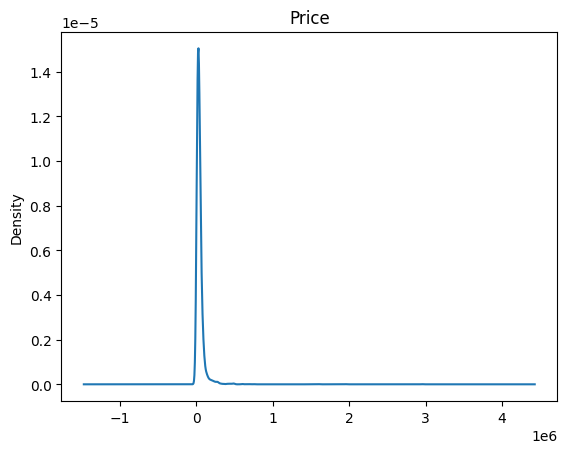

In [57]:
dataset.price.plot.kde(title='Price')
def remove_outliers(df, column, quantile_treshold = .75):
    Q3 = df[column].quantile(quantile_treshold)
    IQR = Q3 #-0
    outlier_step = 1.5 * IQR
    upper_bound = Q3 + outlier_step
    df = df[(df[column] <= upper_bound)]
    return df

In [58]:
dataset = remove_outliers(dataset, 'price', 0.7)

<Axes: title={'center': 'Price'}, ylabel='Density'>

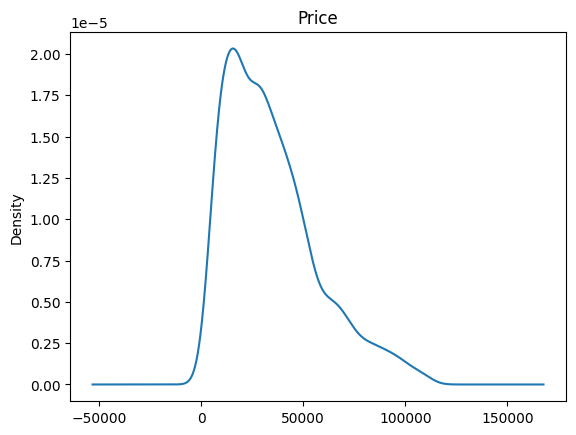

In [59]:
dataset.price.plot.kde(title='Price')

In [60]:
dataset.price.agg(['min', 'max', 'mean', 'std']).round(decimals=2)

min       2000.00
max     112500.00
mean     34381.72
std      22635.33
Name: price, dtype: float64

## MODEL

In [61]:
# label_encoder = LabelEncoder()
# 
# dataset['brand'] = label_encoder.fit_transform(dataset['brand'])
# dataset['model'] = label_encoder.fit_transform(dataset['model'])
# dataset['fuel_type'] = label_encoder.fit_transform(dataset['fuel_type'])
# dataset['engine'] = label_encoder.fit_transform(dataset['engine'])
# dataset['transmission'] = label_encoder.fit_transform(dataset['transmission'])
# dataset['accident'] = label_encoder.fit_transform(dataset['accident'])
# dataset['clean_title'] = label_encoder.fit_transform(dataset['clean_title'])

# dataset = pd.get_dummies(dataset, columns=['brand', 'model', 'fuel_type', 'engine', 'transmission', 'accident', 'clean_title'])
# dataset = dataset.apply(pd.to_numeric, errors='coerce')

In [76]:
Target = 'price'
Predictors = [col for col in dataset.columns.to_list() if col != Target]
x_train, x_test, y_train, y_test = train_test_split(dataset[Predictors], dataset[Target], random_state = 42, test_size = 0.2)

In [77]:
x_train

,brand,model,model_year,milage,fuel_type,engine,transmission,accident,clean_title
3255,BMW,i3 Base,2015,26000,Gasoline,170.0HP 0.65L Electric Motor Electric Fuel System,1-Speed A/T,None,Yes
1570,Chevrolet,Express 1500 Cargo,2004,152000,Gasoline,195.0HP 4.3L V6 Cylinder Engine Gasoline Fuel,A/T,Reported,Yes
1878,Chrysler,Sebring LX,2008,67303,Gasoline,173.0HP 2.4L 4 Cylinder Engine Gasoline Fuel,A/T,None,Yes
3027,Lexus,RX 300 4WD,1999,249083,Gasoline,220.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Reported,Yes
3692,Volkswagen,Passat 2.0T SE,2020,49400,Gasoline,174.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,None,Yes
...,...,...,...,...,...,...,...,...,...
1203,Rivian,R1S Launch Edition,2023,4500,Gasoline,835.0HP Electric Motor Electric Fuel System,1-Speed A/T,None,Yes
1368,Ford,Maverick Lariat,2022,13700,Hybrid,191.0HP 2.5L 4 Cylinder Engine Gas/Electric Hy...,CVT Transmission,None,Yes
912,Mazda,CX-30 2.5 S Select Package,2022,4004,Gasoline,186.0HP 2.5L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,None,Yes
3687,Audi,A4 2.0T Premium,2014,90236,E85 Flex Fuel,220.0HP 2.0L 4 Cylinder Engine Flex Fuel Capab...,Transmission w/Dual Shift Mode,None,Yes


In [78]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from pyDOE import lhs

# Define the parameter space for Latin Hypercube Sampling
n_samples = 7  # Number of samples
n_dim = 4  # Number of dimensions (n_estimators and max_depth)

# Generate Latin Hypercube Samples
lhd = lhs(n_dim, samples=n_samples)

# Map the LHS to the parameter space
param_space = {
    'rf_model__n_estimators': (30, 400),
    'rf_model__max_depth': (1, 10),
    'rf_model__min_samples_split': (0,1),
    'rf_model__min_samples_leaf': (0,0.1)
}

samples = {}
for i, (key, val) in enumerate(param_space.items()):
    samples[key] = lhd[:, i] * (val[1] - val[0]) + val[0]

# Convert to integers
samples['rf_model__n_estimators'] = samples['rf_model__n_estimators'].astype(int)
samples['rf_model__max_depth'] = samples['rf_model__max_depth'].astype(int)
samples['rf_model__min_samples_split'] = samples['rf_model__min_samples_split'].astype(float)
samples['rf_model__min_samples_leaf'] = samples['rf_model__min_samples_leaf'].astype(float)

# Create column transformer for one hot encoding
ct = ColumnTransformer([("cat", OneHotEncoder(handle_unknown = "ignore"),['brand','model','fuel_type','engine','transmission','accident','clean_title'])], remainder="passthrough")

# Define the model
rf_model = RandomForestRegressor(random_state = 1)

# Make pipeline to combine preprocessing and model
model = Pipeline([("preprocessing",ct),("rf_model",rf_model)])

# Define the grid search with cross-validation
# cv = KFold(n_splits=2, shuffle=True, random_state=0)
grid_search = GridSearchCV(model, samples, n_jobs=-1, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(x_train, y_train)

# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")


Best parameters: {'rf_model__max_depth': 9, 'rf_model__min_samples_leaf': 0.009207815553137093, 'rf_model__min_samples_split': 0.10674536608997195, 'rf_model__n_estimators': 365}


In [79]:
import pickle

filename = 'finalized_model.sav'
pickle.dump(grid_search, open(filename, 'wb'))

In [130]:
loaded_model = pickle.load(open(filename, 'rb'))
best_model = loaded_model.best_estimator_
result = best_model.score(x_test, y_test)
print(result)

0.5004488415122299


In [131]:
pred_dict = {   "brand": "Toyota",
        "model": "Corolla",
        "model_year": 2020,
        "milage": 15000,
        "fuel_type": "Gasoline",
        "engine": "1.8L I4",
        "transmission": "Automatic",
        "accident": "None",
        "clean_title": "Yes"}
pred_df = pd.DataFrame(pred_dict, index=[0])
best_model.predict(pred_df)
# loaded_model.predict(np.array(["Toyota", "Corolla", 2020, 15000, "Gasoline", "1.8L I4", "Automatic", "None","Yes"]).reshape(1,-1))

array([54932.10102673])

In [132]:
# loaded_model.predict()
# new_x_test = x_test.reset_index(drop=True)
print(x_test.iloc[268])
print([best_model.predict(x_test.iloc[[268]]), y_test.iloc[268]])

brand                                                  Dodge
model                                            Charger R/T
model_year                                              2006
milage                                                 91300
fuel_type                                           Gasoline
engine          350.0HP 5.7L 8 Cylinder Engine Gasoline Fuel
transmission                                     5-Speed A/T
accident                                                None
clean_title                                              Yes
Name: 2470, dtype: object
[array([16103.25393078]), 9200]


In [133]:
from sklearn.metrics import mean_absolute_error
y_pred = best_model.predict(x_test)
mean_absolute_error(y_true=y_test, y_pred=y_pred)

11668.725577797479

In [134]:
y_pred_train = best_model.predict(x_train)
mean_absolute_error(y_true=y_train, y_pred=y_pred_train)

11251.022842558756

In [184]:
import numpy as np

residuals = dataset[Target] - best_model.predict(dataset[Predictors])

alpha0 = 0.05
alpha1 = 0.15
alpha2 = 0.45
lower_quantile0 = round(np.percentile(residuals, ((1.0 - alpha0)/2.0) * 100),3)
upper_quantile0 = round(np.percentile(residuals, (alpha0 + ((1.0 - alpha0)/2.0)) * 100),3)
lower_quantile1 = round(np.percentile(residuals, ((1.0 - alpha1)/2.0) * 100),3)
upper_quantile1 = round(np.percentile(residuals, (alpha1 + ((1.0 - alpha1)/2.0)) * 100),3)
lower_quantile2 = round(np.percentile(residuals, ((1.0 - alpha2)/2.0) * 100),3)
upper_quantile2 = round(np.percentile(residuals, (alpha2 + ((1.0 - alpha2)/2.0)) * 100),3)

# print(f'lower: {best_model.predict(x_test.iloc[[268]]) + lower_quantile}, upper: {best_model.predict(x_test.iloc[[268]]) + upper_quantile} true: {y_test.iloc[268]}')

In [152]:
dataset[Target].values[1]

38005

In [191]:
lower_quantile0, upper_quantile0, lower_quantile1, upper_quantile1, lower_quantile2, upper_quantile2

(-3309.072, -2002.685, -4450.242, -654.887, -8357.948, 5179.976)

In [196]:
c = 0 
u = 0
l = 0
for i in range(len(dataset)):
    t = dataset[Target].values[i]
    p = round(best_model.predict(dataset[Predictors].reset_index(drop=True).iloc[[i]]).item(),3)
    if p < 25_000:
        if p < 10_000:
            if (t >= min(p,p + lower_quantile0) and t <= max(p,p + upper_quantile0)):
                c += 1
            elif t > max(p,p + upper_quantile0):
                l += 1
            elif t < min(p,p + lower_quantile0):
                u += 1
            # print([p + lower_quantile0, t, p + 2*upper_quantile0])
        else:
            if (t >= min(p,p + lower_quantile1) and t <= max(p,p + upper_quantile1)):
                c += 1
            elif t > max(p,p + upper_quantile1):
                l += 1
            elif t < min(p,p + lower_quantile1):
                u += 1
            # print([p + lower_quantile1, t, p + 2*upper_quantile1])
    else:
        if (t >= min(p,p + lower_quantile2) and t <= max(p,p + 2*upper_quantile2)):
            c += 1
        elif t > max(p,p + 2*upper_quantile2):
            l += 1
        elif t < min(p,p + lower_quantile2):
            u += 1
    # print([p + lower_quantile2, t, p + 2*upper_quantile2])
a = (c * 100) / (i+1)
print('Trafność', round(a, 3), '%')
print('Za mało', round((l * 100) / (i+1), 3), '%')
print('Za dużo', round((u * 100) / (i+1), 3), '%')

Trafność 36.5 %
Za mało 28.182 %
Za dużo 35.319 %


In [181]:
p.item()

10807.297136877203

NameError: name 'X_train' is not defined

In [51]:
import pickle
loaded_model2 = pickle.load(open(r'model.sav', 'rb'))
loaded_model2.predict(
    {   "brand": "Toyota",
        "model": "Corolla",
        "model_year": 2020,
        "mileage": 15000,
        "fuel_type": "Gasoline",
        "engine": "1.8L I4",
        "transmission": "Automatic",
        "accident": "None",
        "clean_title": "Yes"})

C:\Users\Michc\anaconda3\envs\torch1\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator OneHotEncoder from version 1.2.2 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Michc\anaconda3\envs\torch1\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator ColumnTransformer from version 1.2.2 when using version 1.4.1.post1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Michc\anaconda3\envs\torch1\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.

ValueError: node array from the pickle has an incompatible dtype:
- expected: {'names': ['left_child', 'right_child', 'feature', 'threshold', 'impurity', 'n_node_samples', 'weighted_n_node_samples', 'missing_go_to_left'], 'formats': ['<i8', '<i8', '<i8', '<f8', '<f8', '<i8', '<f8', 'u1'], 'offsets': [0, 8, 16, 24, 32, 40, 48, 56], 'itemsize': 64}
- got     : [('left_child', '<i8'), ('right_child', '<i8'), ('feature', '<i8'), ('threshold', '<f8'), ('impurity', '<f8'), ('n_node_samples', '<i8'), ('weighted_n_node_samples', '<f8')]

In [34]:
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

class Model():
    def __init__(self):
        self.model = pickle.load(open('finalized_model.sav', 'rb'))
        self.new_model = None

    def fit_model(self, new_data: pd.DataFrame):
        if new_data is not None:
            self.new_model = pickle.load(open('finalized_model.sav', 'rb'))
            new_data.columns = new_data.columns.lower()
            Target = 'price'
            Predictors = ['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine', 'transmission', 'accident', 'clean_title']
            self.new_model.fit(new_data[Predictors], new_data[Target])

    def predict(self, observation: dict, og_mode: bool):
        lower_quantile0, upper_quantile0, lower_quantile1, upper_quantile1, lower_quantile2, upper_quantile2 = [-3309.072, -2002.685, -4450.242, -654.887, -8357.948, 5179.976]
        if observation is None:
            return 0, 0
        pred_df = pd.DataFrame(observation, index=[0])
        if og_mode:
            # p = round(self.model.predict(pred_df.reset_index(drop=True)), 3)
            p = self.model.predict(pred_df.reset_index(drop=True))
        else:
            if self.new_model is not None:
                p = self.new_model.predict(pred_df.reset_index(drop=True))
            else:
                return 0, 0
        if p < 25_000:
            if p < 10_000:
                lower = min(p, p + lower_quantile0)
                upper = max(p, p + upper_quantile0)
            else:
                lower = min(p, p + lower_quantile1)
                upper = max(p, p + upper_quantile1)
        else:
            lower = min(p, p + lower_quantile2)
            upper = max(p, p + 2 * upper_quantile2)
        return lower[0], upper[0]

In [35]:
model = Model()

In [5]:
car = {
  "brand": "Toyota",
                "model": "Corolla",
                "model_year": 2020,
                "milage": 15000,
                "fuel_type": "Gasoline",
                "engine": "1.8L I4",
                "transmission": "Automatic",
                "accident": "No",
                "clean_title": "Yes"
}

In [36]:
lower, upper = model.predict(car, True)
# lower = lower[0]

In [37]:
lower, upper

(46574.15302672991, 65292.053026729904)

In [67]:
dataset.columns.str.lower()

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'accident', 'clean_title', 'price'],
      dtype='object')